<a href="https://colab.research.google.com/github/luiscunhacsc/finance_python/blob/main/27_Benchamarking_Basics_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Required Libraries
Before we begin, ensure you have the necessary Python libraries installed. You'll need `yfinance`, `pandas`, and `numpy`.


In [ ]:
%pip install -q yfinance pandas numpy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Download Historical Data
Next, we'll use the `yfinance` library to download historical data for the selected stocks and the S&P 500 index.


In [ ]:
import yfinance as yf
import pandas as pd

# Define the list of stock tickers for the hypothetical portfolio
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA", "NVDA", "JNJ", "V", "PG", "JPM",
           "UNH", "HD", "MA", "DIS", "PFE", "NFLX", "BAC", "KO", "XOM", "CSCO"]

# Download data for the portfolio
portfolio_data = yf.download(tickers, start="2015-01-01", end="2024-06-01")['Adj Close']

# Download data for the S&P 500 index
sp500_data = yf.download("^GSPC", start="2015-01-01", end="2024-06-01")['Adj Close']


[*********************100%%**********************]  20 of 20 completed
[*********************100%%**********************]  1 of 1 completed


# Calculate Portfolio Returns
Now, let's calculate the daily returns for the portfolio by averaging the returns of the individual holdings.


In [ ]:
# Calculate daily returns for each stock
portfolio_returns = portfolio_data.pct_change().dropna()

# Calculate average daily return for the portfolio
portfolio_returns['Portfolio'] = portfolio_returns.mean(axis=1)

# Calculate daily returns for the S&P 500 index
sp500_returns = sp500_data.pct_change().dropna()


# Compare Portfolio Performance with the S&P 500
In this step, we'll compare the cumulative return of the portfolio with the S&P 500 index.


In [ ]:
import numpy as np

# Calculate cumulative returns for the portfolio and the S&P 500
portfolio_cumulative_return = np.prod(1 + portfolio_returns['Portfolio']) - 1
sp500_cumulative_return = np.prod(1 + sp500_returns) - 1

# Calculate excess return
excess_return = portfolio_cumulative_return - sp500_cumulative_return

# Display the results
print(f"Portfolio Cumulative Return: {portfolio_cumulative_return:.4f}")
print(f"S&P 500 Cumulative Return: {sp500_cumulative_return:.4f}")
print(f"Excess Return: {excess_return:.4f}")


Portfolio Cumulative Return: 5.5275
S&P 500 Cumulative Return: 1.5641
Excess Return: 3.9634


# Visualize Portfolio vs. S&P 500 Performance
Finally, let's visualize the performance of the portfolio compared to the S&P 500 over time.


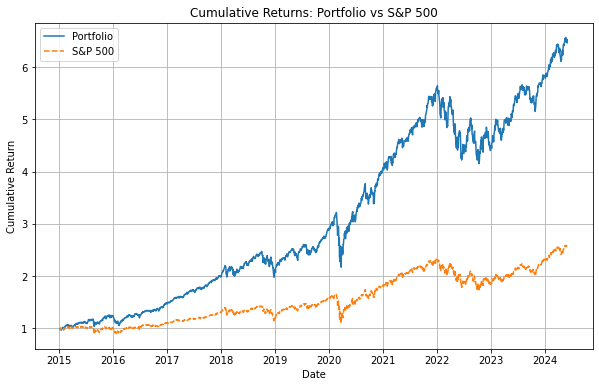

In [ ]:
import matplotlib.pyplot as plt

# Calculate cumulative returns over time
portfolio_cumulative = (1 + portfolio_returns['Portfolio']).cumprod()
sp500_cumulative = (1 + sp500_returns).cumprod()

# Plot the cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(portfolio_cumulative, label="Portfolio")
plt.plot(sp500_cumulative, label="S&P 500", linestyle='--')
plt.title("Cumulative Returns: Portfolio vs S&P 500")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.show()


# Interpretation of Results
In this example, we constructed a hypothetical portfolio consisting of 20 diverse stocks from various sectors. We calculated the cumulative return of this portfolio and compared it to the cumulative return of the S&P 500 index. The resulting excess return indicates whether the portfolio outperformed or underperformed the benchmark.

- **Portfolio Cumulative Return**: The overall return of the portfolio over the specified period.
- **S&P 500 Cumulative Return**: The return of the S&P 500 index over the same period.
- **Excess Return**: The difference between the portfolio's return and the S&P 500's return. A positive value indicates outperformance, while a negative value indicates underperformance.

The visualization shows how the portfolio's performance has varied compared to the S&P 500 index over time.
